<a href="https://colab.research.google.com/github/parthrjpt/EAS546_Projects/blob/main/RFlearning_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gym

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces

### RL Environment

In [ ]:
grid = np.zeros((5,4))

pos1 = [0, 0] #start
pos2 = [4,3] #finish

#non-permitted blocks
pos3 = [2, 0]
pos4 = [3, 0]
pos5 = [1,2]
pos6 = [3,2]

pos7 = [4,0] #key
pos8 = [4,2] #diamond
pos9 = [2,2] #fire

grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.5

grid[tuple(pos7)]= 0.2
grid[tuple(pos8)]= 0.4
grid[tuple(pos9)]= 0.8

grid[tuple(pos3)] = 0.3
grid[tuple(pos4)] = 0.3
grid[tuple(pos5)] = 0.3
grid[tuple(pos6)] = 0.3

print(grid)

[[1.  0.  0.  0. ]
 [0.  0.  0.3 0. ]
 [0.3 0.  0.8 0. ]
 [0.3 0.  0.3 0. ]
 [0.2 0.  0.4 0.5]]


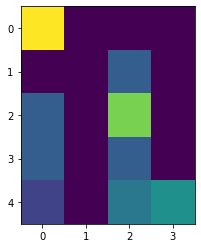

In [ ]:
plt.imshow(grid)

## Environment Initialization and definition

In [ ]:
class GridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.observation_space = spaces.Discrete(9)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 5
        
    def reset(self):
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [4, 3]
        self.blocked_pos =[[2,0],[3,0],[1,2],[3,2]]
        self.key_pos = [4,0]
        self.reward_pos = [4,2]
        self.penalty_pos = [2,2]
        self.state = np.zeros((5,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        
        self.state[tuple(self.key_pos)]= 0.2
        self.state[tuple(self.reward_pos)]= 0.4
        self.state[tuple(self.penalty_pos)]= 0.8

        self.state[tuple(self.blocked_pos[0])] = 0.3
        self.state[tuple(self.blocked_pos[1])] = 0.3
        self.state[tuple(self.blocked_pos[2])] = 0.3
        self.state[tuple(self.blocked_pos[3])] = 0.3

        observation = self.agent_pos
        return observation
    
    def step(self, action):
        if action == 0:
          self.agent_pos[0] += 1
        if action == 1:
          self.agent_pos[0] -= 1
        if action == 2:
          self.agent_pos[1] += 1
        if action == 3:
          self.agent_pos[1] -= 1
          
        self.agent_pos = np.clip(self.agent_pos, 0, 2)
        self.state = np.zeros((5,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        
        self.state[tuple(self.key_pos)]= 0.2
        self.state[tuple(self.reward_pos)]= 0.4
        self.state[tuple(self.penalty_pos)]= 0.8

        self.state[tuple(self.blocked_pos[0])] = 0.3
        self.state[tuple(self.blocked_pos[1])] = 0.3
        self.state[tuple(self.blocked_pos[2])] = 0.3
        self.state[tuple(self.blocked_pos[3])] = 0.3
        
        observation = self.agent_pos
        
        reward = 0
        if (self.agent_pos == self.goal_pos).all():
          reward = 10
        if (self.agent_pos == self.reward_pos).all():
          reward = 3
        if (self.agent_pos == self.penalty_pos).all():
          reward = -3
        if (self.agent_pos == self.key_pos).all():
          reward = 1
          #has_key= 1
          

        self.timestep += 1
        done = True if (self.timestep >= self.max_timesteps) or (self.agent_pos == self.goal_pos).all() else False
        info = {}
        
        return observation, reward, done, info
        
    def render(self):
        plt.imshow(self.state)

## Testing the Environment

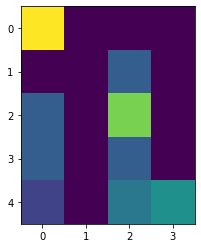

In [ ]:
env = GridEnvironment()
obs = env.reset()
env.render()

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

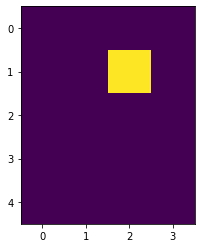

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import widgets
import time

output_grid = widgets.Grid(1, 1)
for _ in range(5):
  grid = np.zeros((5, 4))
  grid[np.random.randint(5), np.random.randint(4)] = 1
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    plt.imshow(grid)
  time.sleep(1)

Reward: 0


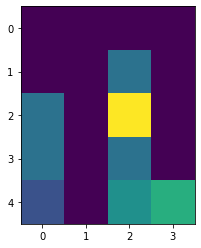

In [ ]:
# setting up environment and agent
action = 0
observation, reward, done, info = env.step(action)
env.render()
print('Reward:', reward)

## Random Agent

In [ ]:
class RandomAgent:
    def __init__(self, env):
        self.env = env
        self.observation_space = env.observation_space
        self.action_space = env.action_space
        
    def step(self, observation):
        return np.random.choice(self.action_space.n)

## Running a Markov Decision Process


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

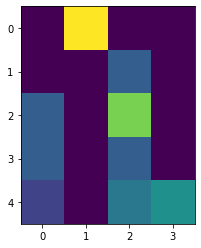

<IPython.core.display.Javascript object>

In [ ]:
# setting up environment and agent
env = GridEnvironment()
agent = RandomAgent(env)

obs = env.reset()
done = False

# setting up animation
output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

# MDP Loop
while not done:
  action = agent.step(obs)
  obs, reward, done, info = env.step(action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  time.sleep(1)